[<img src="data/photutils_banner.svg" width=300 alt="">](http://photutils.readthedocs.io/en/stable/index.html)

# Background Estimation with `photutils`
---

##### What is background estimation?
In order to most accurately do photometric analysis of celestial sources in image data, it is important to estimate and subtract the image background. Any astronomical image will have background noise, due to both detector effects and background emission from the night sky. This noise can be modeled as uniform, or as varying with position on the detector. 

The `photutils` package provides tools for estimating 2-dimensional background noise, which can then be subtracted from an image to ensure the most accurate photometry possible.

##### What does this tutorial include?
This tutorial covers the basics of background estimation and subtraction, including the following methods:
- Scalar Background Estimation
- 2-D Background Estimation

The methods demonstrated here are available in narrative form within the `photutils.background` [documentation](http://photutils.readthedocs.io/en/stable/background.html).

<div class="alert alert-block alert-info">**Note:** This notebook focuses on global background estimation. Local background subtraction with <b>annulus apertures</b> is demonstrated in the [aperture photometry notebook](03_photutils_aperture_photometry.ipynb).</div><div class="alert alert-block alert-warning">**Important:** Before proceeding, please be sure to install or update your [AstroConda](https://astroconda.readthedocs.io) distribution. This notebook may not work properly with older versions of AstroConda.</div>

---

## Import necessary packages

First, let's import packages that we will use to perform arithmetic functions and visualize data:

In [3]:
import numpy as np
from astropy.io import fits
from astropy.stats import sigma_clipped_stats, SigmaClip
from astropy.visualization import ZScaleInterval, ImageNormalize
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
% matplotlib inline

Let's also define some `matplotlib` parameters, to make sure our plots look nice. (See [here](https://matplotlib.org/users/customizing.html) to learn more about customizing `matplotlib`.)

In [4]:
matplotlib.rc('font', family='serif', weight='light', size=12)
matplotlib.rc('mathtext', bf='serif:normal')
matplotlib.rc('axes', titlesize=18, titlepad=12, labelsize=16)
matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)

## Retrieve data

We have place the data for this tutorial in the github repository, for easy access. The data were originally retrieved from the STScI archive: https://archive.stsci.edu/prepds/udf/udf_hlsp.html.

In [5]:
with fits.open('data/h_udf_wfc_v_drz_img.fits') as hdulist:
    v_data = hdulist[0].data

Let's look at the data:

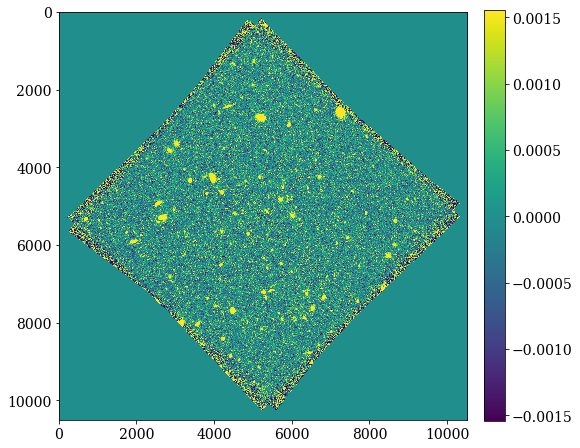

In [13]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 8))

clim = (0, 1e-2)

v_data_plot = np.copy(v_data)
v_data_plot[v_data_plot <= 0] = 1e-10

norm_image = ImageNormalize(v_data, interval=ZScaleInterval())
fitsplot = ax1.imshow(v_data, norm=norm_image)#, clim=clim)

plt.colorbar(fitsplot, fraction=0.046, pad=0.04)

plt.show()

## Mask data & perform scalar background estimation

In [5]:
mean, median, std = sigma_clipped_stats(v_data, sigma=3.0, iters=5)
print((mean, median, std))    

(4.5876512465795261e-06, 0.0, 0.00030845671991731893)


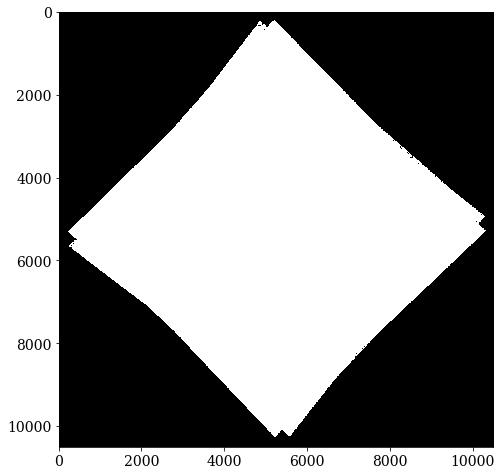

In [38]:
mask = v_data == 0

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(mask, cmap='Greys')
plt.show()

In [7]:
mean, median, std = sigma_clipped_stats(v_data, sigma=3.0, iters=5, mask=mask)
print((mean, median, std))    

(3.2906001630868766e-05, 2.3192115e-05, 0.000618062544854335)


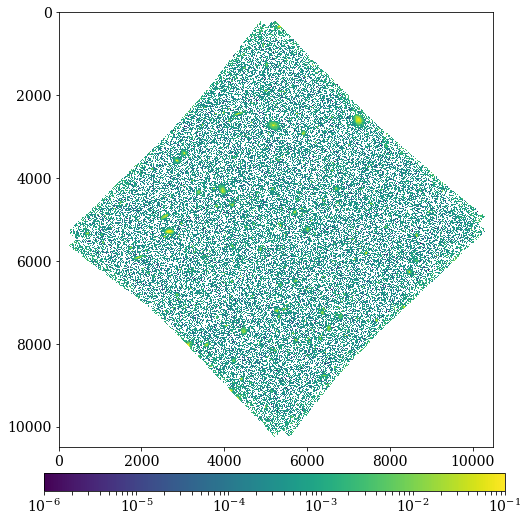

In [27]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 8))

clim = (1e-6, 1e-1)
v_data_bkgd = v_data - median
v_data_plot = np.copy(v_data_bkgd)
v_data_plot[v_data_plot <= 0] = 1e-10

fitsplot = ax1.imshow(v_data_plot * ~mask, norm=LogNorm(), clim=clim)

cbar_ax = fig.add_axes([0.11, 0.05, 0.8, 0.03])
plt.colorbar(fitsplot, cax=cbar_ax, orientation='horizontal')

plt.show()

## Perform 2-D background estimation

In [ ]:
from photutils.background import Background2D, MedianBackground

In [15]:
sigma_clip = SigmaClip(sigma=3., iters=10)
bkg_estimator = MedianBackground()
bkg = Background2D(v_data, 400, filter_size=(10, 10), mask=mask,
                   sigma_clip=sigma_clip, bkg_estimator=bkg_estimator)

print(bkg.background_median)
print(bkg.background_rms_median)

1.84211013965e-05
0.000589695103296


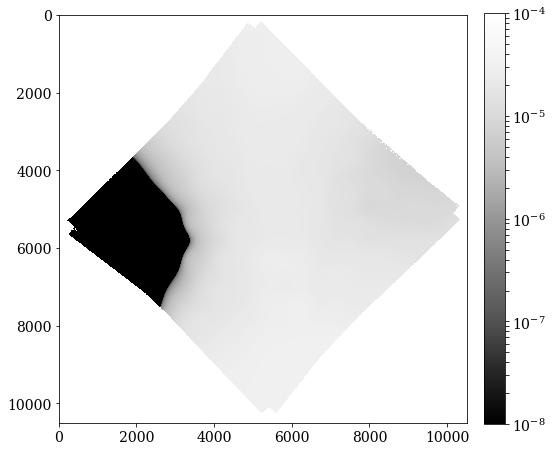

In [35]:
bkgd = np.copy(bkg.background)
bkgd[bkgd <= 0] = 1e-10

fig, ax = plt.subplots(1, 1, figsize=(8,8))
bkgd_plot = ax.imshow(bkgd * ~mask, cmap='Greys_r', norm=LogNorm(), clim=(1e-8, 1e-4))
fig.colorbar(bkgd_plot, fraction=0.046, pad=0.04)
plt.show()

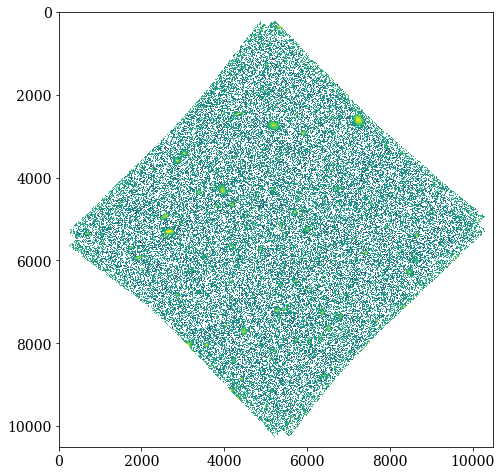

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.imshow((v_data - bkg.background) * ~mask, norm=LogNorm(), clim=(1e-6, 1e-1))
plt.show()

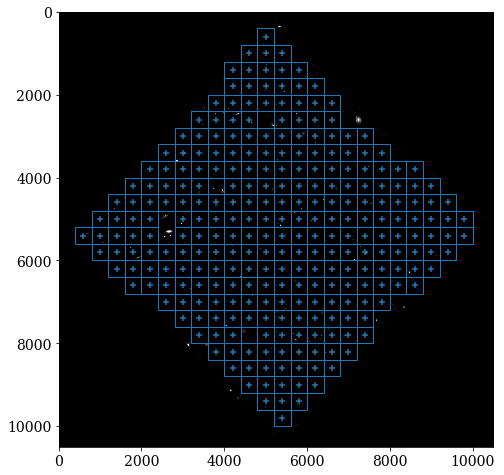

In [25]:
# plot the meshes
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.imshow(v_data_plot * ~mask, cmap='Greys_r', clim=(1e-3, 1e-1))
bkg.plot_meshes(outlines=True, color='#1f77b4')
plt.show()

## Exercises
---

To continue with this `photutils` tutorial, go on to the [source detection notebook](02_photutils_source_detection.ipynb).

---
<i>May 2018

Author: Lauren Chambers (lchambers@stsci.edu)

For more examples and details, please visit the [photutils](http://photutils.readthedocs.io/en/stable/index.html) documentation.</i>